# Phase 1: Expose the Lot & Land Mysteries!
この捜査では、住宅価格の「土台」となる土地の属性を暴く。
広さ、形状、傾斜、そして配置がどのように価値に影響するかをプロファイリングする。

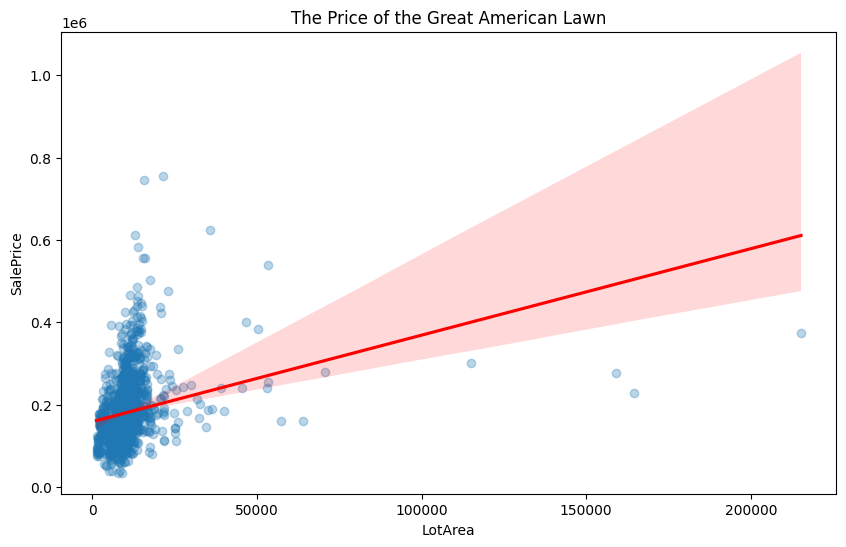

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('train.csv')
plt.figure(figsize=(10, 6))
sns.regplot(x='LotArea', y='SalePrice', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('The Price of the Great American Lawn')
plt.show()

In [3]:
outliers = df[df['LotArea'] > 40000].sort_values(by='LotArea', ascending=False)
print(outliers[['LotArea', 'SalePrice', 'OverallQual', 'Neighborhood', 'MSZoning']])

      LotArea  SalePrice  OverallQual Neighborhood MSZoning
313    215245     375000            7       Timber       RL
335    164660     228950            5       Timber       RL
249    159000     277000            6      ClearCr       RL
706    115149     302000            7      ClearCr       RL
451     70761     280000            7      ClearCr       RL
1298    63887     160000           10      Edwards       RL
1396    57200     160000            5       Timber       RL
769     53504     538000            8      StoneBr       RL
457     53227     256000            4      ClearCr       RL
384     53107     240000            6      ClearCr       RL
53      50271     385000            9      Veenker       RL
661     46589     402000            8      NoRidge       RL
848     45600     240000            6      ClearCr       RL
523     40094     184750           10      Edwards       RL


In [4]:
target_ids = [1298, 523]
deep_dive = df.loc[target_ids]
print(deep_dive[['LotArea', 'SalePrice', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'GrLivArea']])

      LotArea  SalePrice  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
1298    63887     160000           10            5       2008          2008   
523     40094     184750           10            5       2007          2008   

      GrLivArea  
1298       5642  
523        4676  


元のデータ件数: 1460
浄化後のデータ件数: 1458


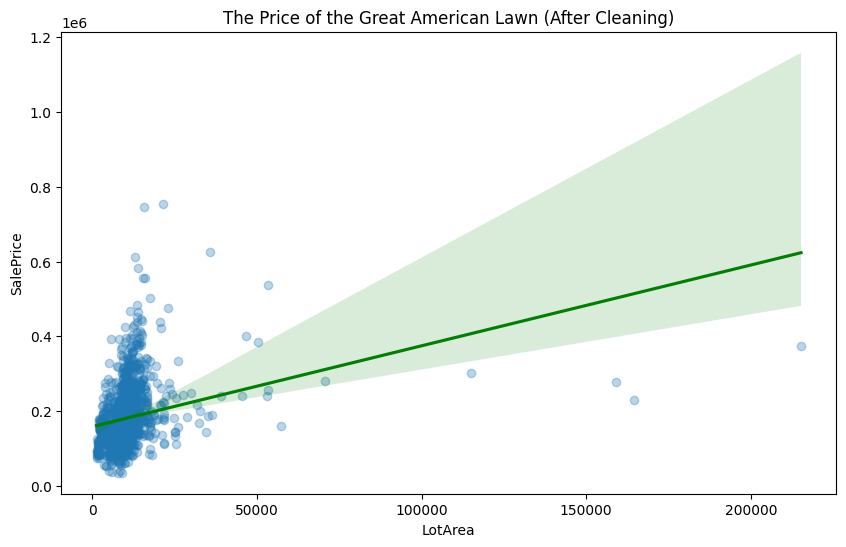

In [5]:
df_cleaned = df.drop(index=[1298, 523])
print(f"元のデータ件数: {len(df)}")
print(f"浄化後のデータ件数: {len(df_cleaned)}")
plt.figure(figsize=(10, 6))
sns.regplot(x='LotArea', y='SalePrice', data=df_cleaned,
            scatter_kws={'alpha':0.3}, line_kws={'color':'green'}) # 浄化の緑！
plt.title('The Price of the Great American Lawn (After Cleaning)')
plt.show()

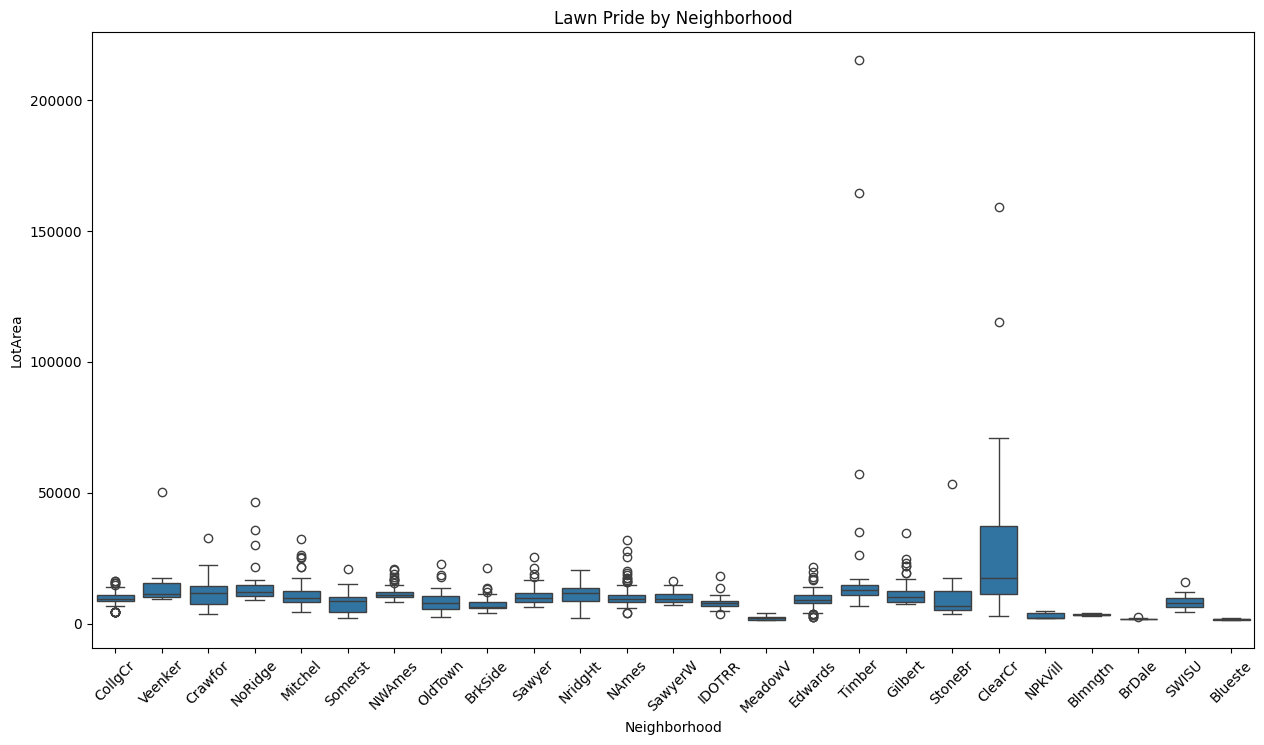

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
sns.boxplot(x='Neighborhood', y='LotArea', data=df_cleaned)
plt.xticks(rotation=45)
plt.title('Lawn Pride by Neighborhood')
plt.show()

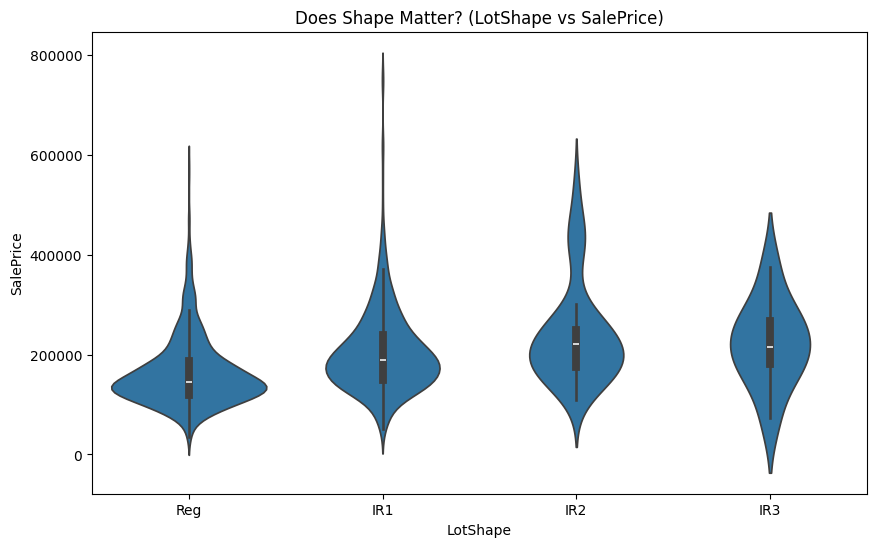

In [7]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='LotShape', y='SalePrice', data=df_cleaned)
plt.title('Does Shape Matter? (LotShape vs SalePrice)')
plt.show()

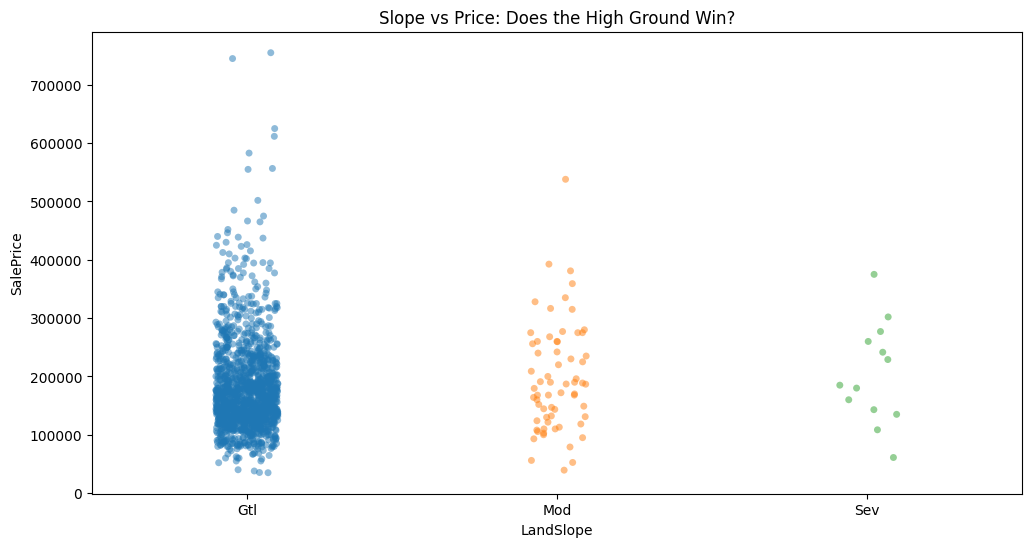

In [8]:
plt.figure(figsize=(12, 6))
sns.stripplot(x='LandSlope', y='SalePrice', hue='LandSlope', data=df_cleaned, jitter=True, alpha=0.5)
plt.title('Slope vs Price: Does the High Ground Win?')
plt.show()

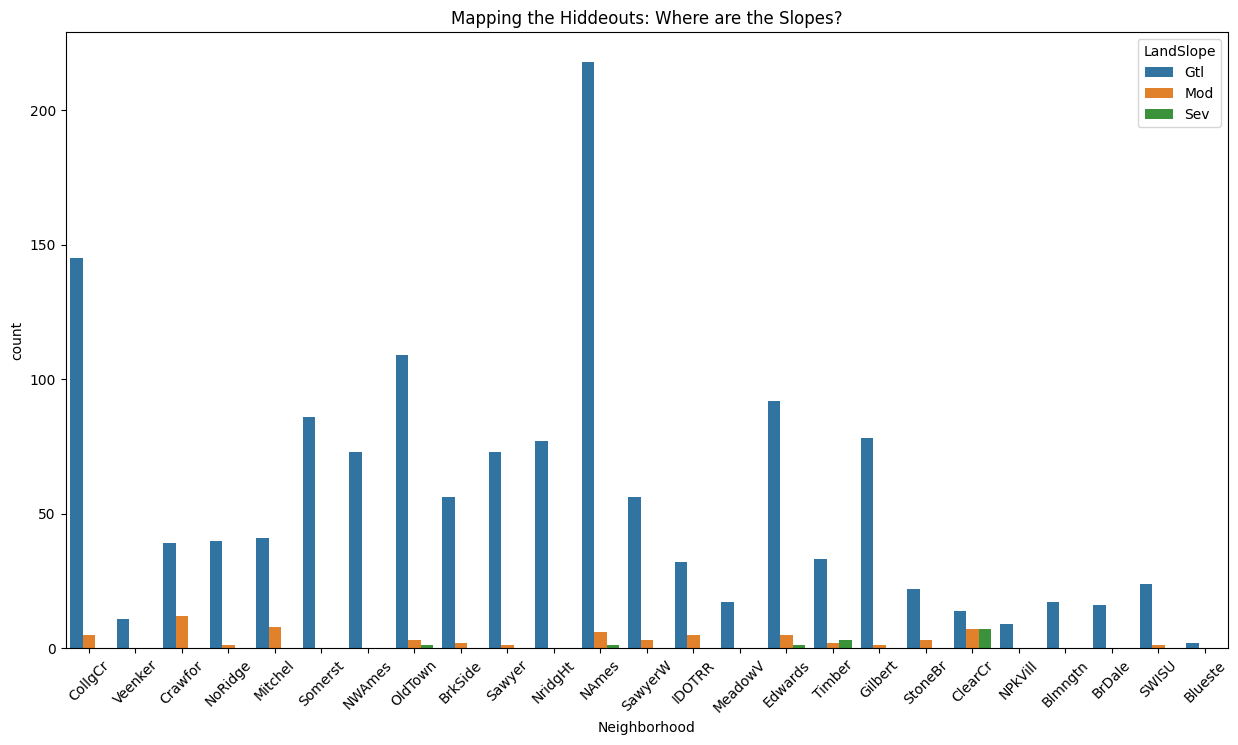

In [9]:
plt.figure(figsize=(15, 8))
sns.countplot(x='Neighborhood', hue='LandSlope', data=df_cleaned)
plt.xticks(rotation=45)
plt.title('Mapping the Hiddeouts: Where are the Slopes?')
plt.show()

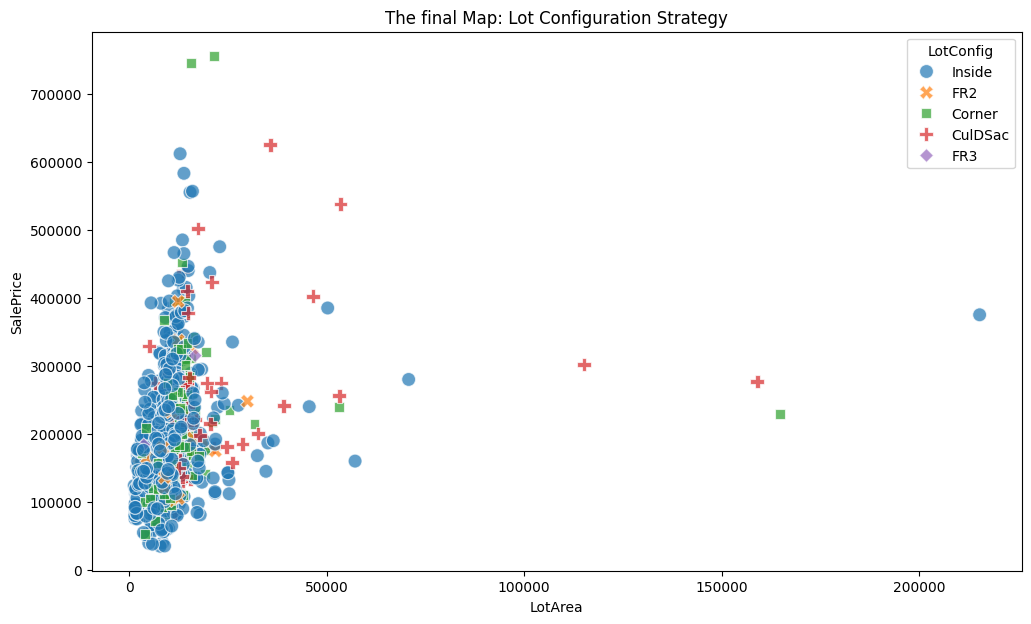

In [10]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x='LotArea', y='SalePrice', hue='LotConfig', style='LotConfig', data=df_cleaned, s=100, alpha=0.7)
plt.title('The final Map: Lot Configuration Strategy')
plt.show()

# Phase 2: Expose the House Specs Mysteries!
土地（Lot）の捜査は完了した。ここからは、その上に建つ「建物の正体」を暴いていく。

まずは居住面積（GrLivArea）が、どのように価格を支配しているかを確認する。

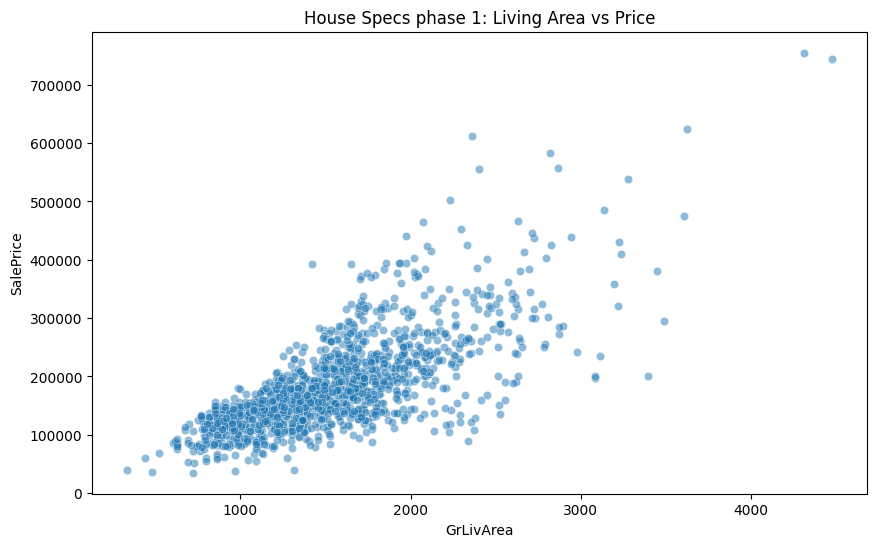

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_cleaned, alpha=0.5)
plt.title('House Specs phase 1: Living Area vs Price')
plt.show()

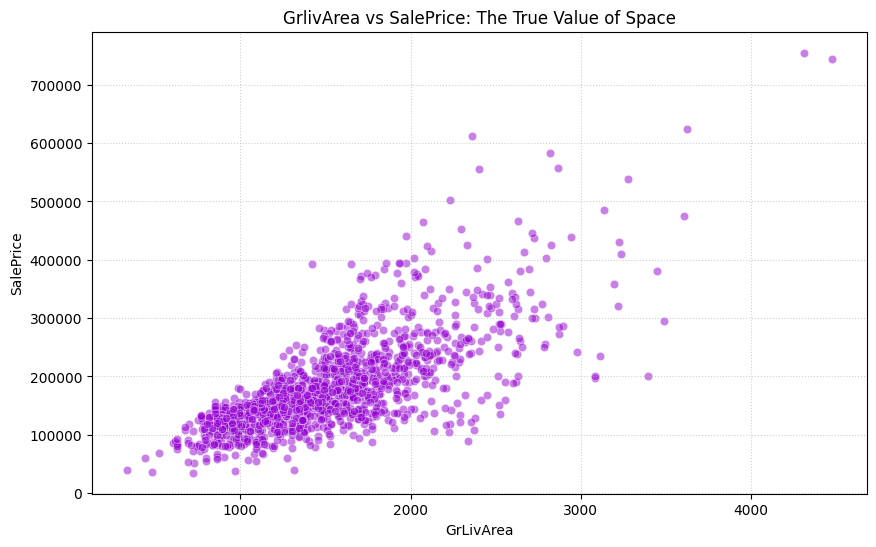

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_cleaned, alpha=0.5, color='darkviolet')
plt.title('GrlivArea vs SalePrice: The True Value of Space')
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

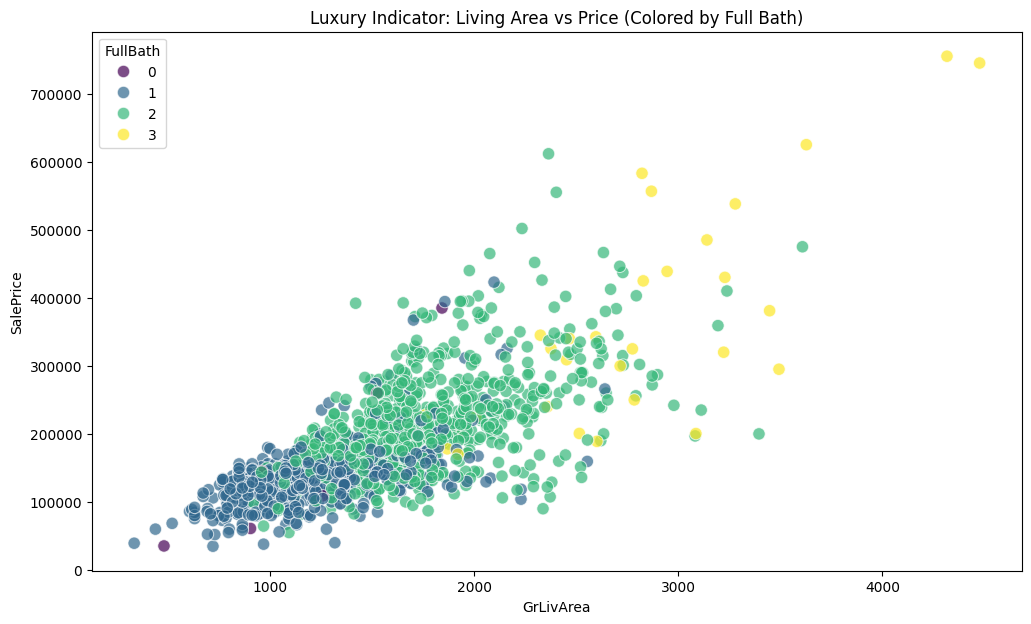

In [14]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x='GrLivArea', y='SalePrice', hue='FullBath',palette='viridis', data=df_cleaned, s=80, alpha=0.7)
plt.title('Luxury Indicator: Living Area vs Price (Colored by Full Bath)')
plt.show()

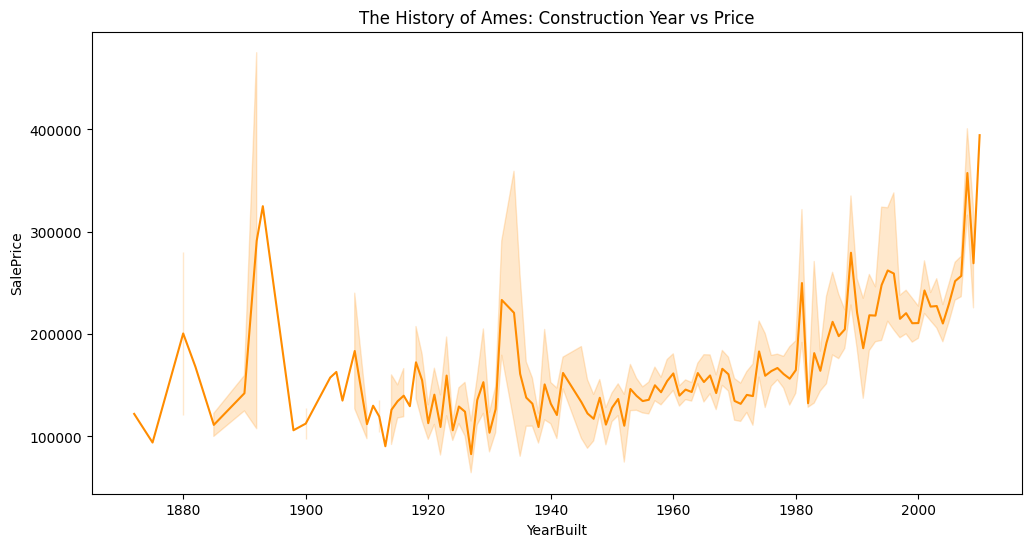

In [15]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='YearBuilt', y='SalePrice', data=df_cleaned, color='darkorange')
plt.title('The History of Ames: Construction Year vs Price')
plt.show()

/tmp/ipython-input-794380145.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Exterior1st', y='SalePrice', data=df_cleaned, palette='coolwarm')


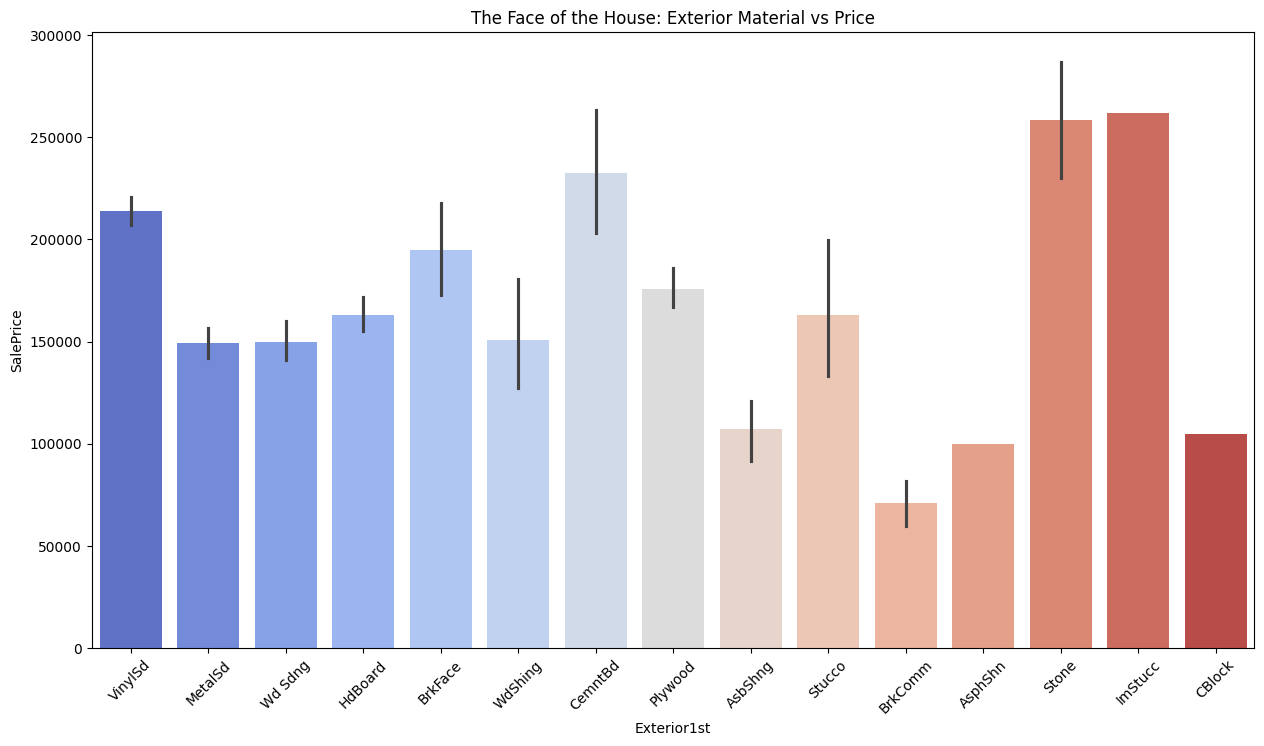

In [17]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Exterior1st', y='SalePrice', data=df_cleaned, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('The Face of the House: Exterior Material vs Price')
plt.show()

/tmp/ipython-input-1236399651.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='OverallQual', y='SalePrice', data=df_cleaned, palette='magma')


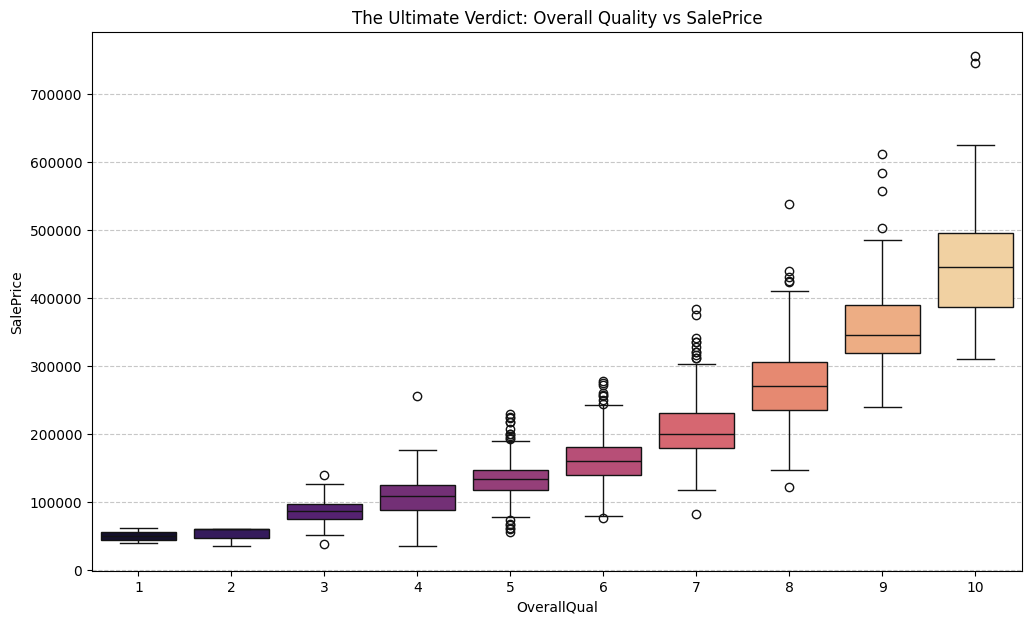

In [18]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='OverallQual', y='SalePrice', data=df_cleaned, palette='magma')
plt.title('The Ultimate Verdict: Overall Quality vs SalePrice')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/tmp/ipython-input-2542548891.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GarageCars', y='SalePrice', data=df_cleaned, palette='cubehelix', ax=ax[1])


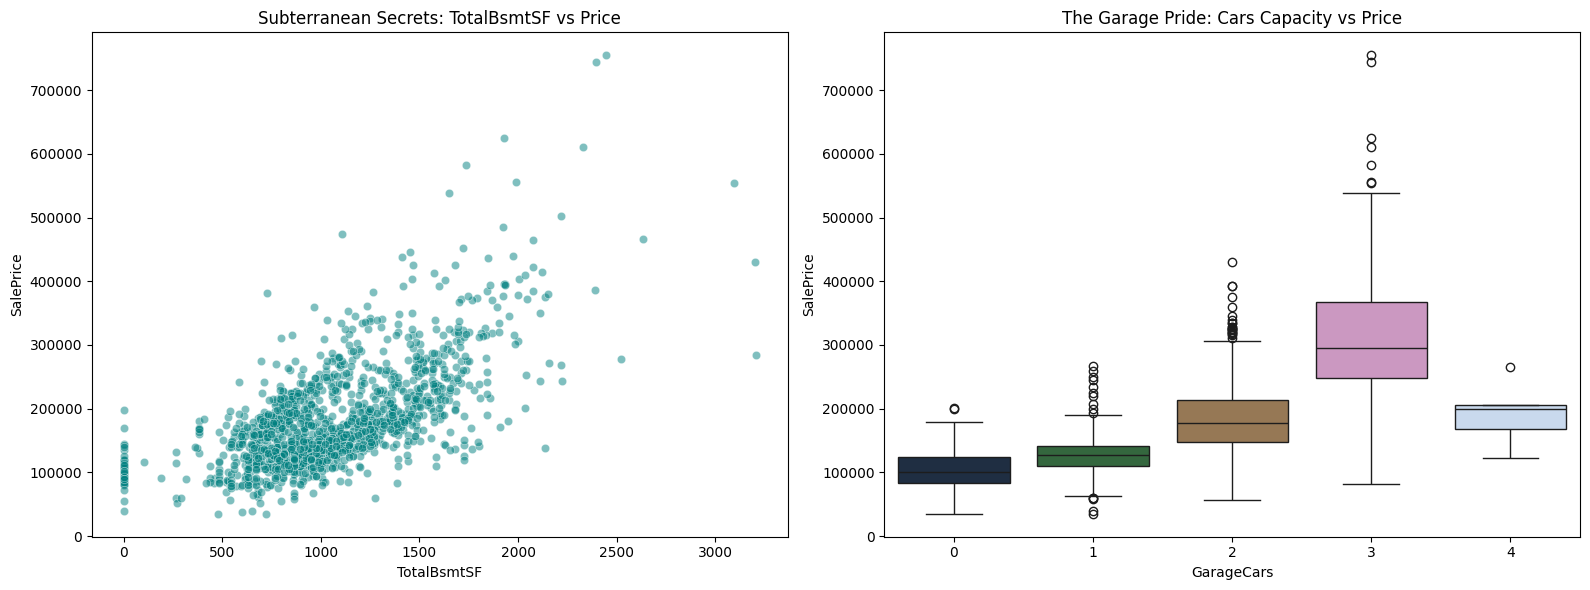

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=df_cleaned, alpha=0.5, color='teal', ax=ax[0])
ax[0].set_title('Subterranean Secrets: TotalBsmtSF vs Price')
sns.boxplot(x='GarageCars', y='SalePrice', data=df_cleaned, palette='cubehelix', ax=ax[1])
ax[1].set_title('The Garage Pride: Cars Capacity vs Price')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2621155539.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='KitchenQual', y='SalePrice', order=['Ex', 'Gd', 'TA', 'Fa'],data=df_cleaned,palette='spring')


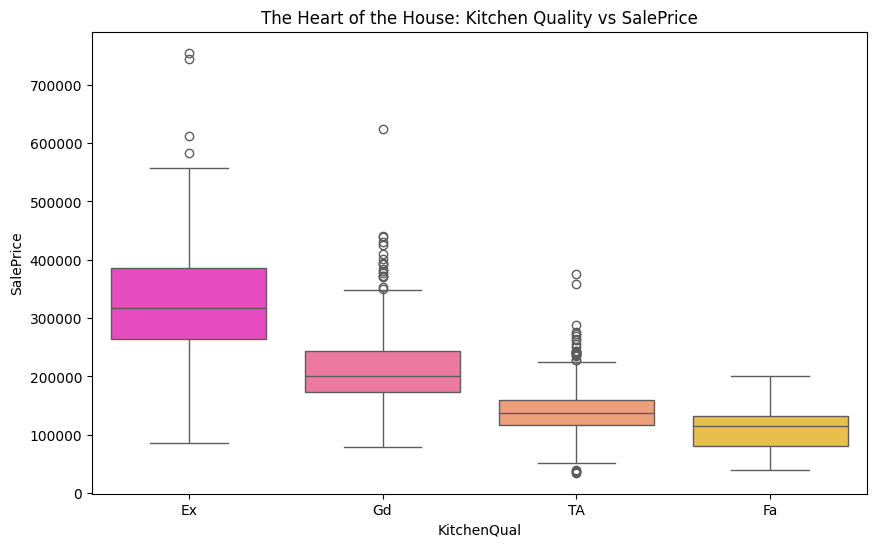

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='KitchenQual', y='SalePrice', order=['Ex', 'Gd', 'TA', 'Fa'],data=df_cleaned,palette='spring')
plt.title('The Heart of the House: Kitchen Quality vs SalePrice')
plt.show()

            OverallQual    YearBuilt      SalePrice
GarageCars                                         
0              4.604938  1942.481481  103317.283951
1              5.189702  1948.243902  128116.688347
2              6.246659  1978.752126  183880.645200
3              7.938889  1997.233333  310329.933333
4              5.400000  1955.600000  192655.800000


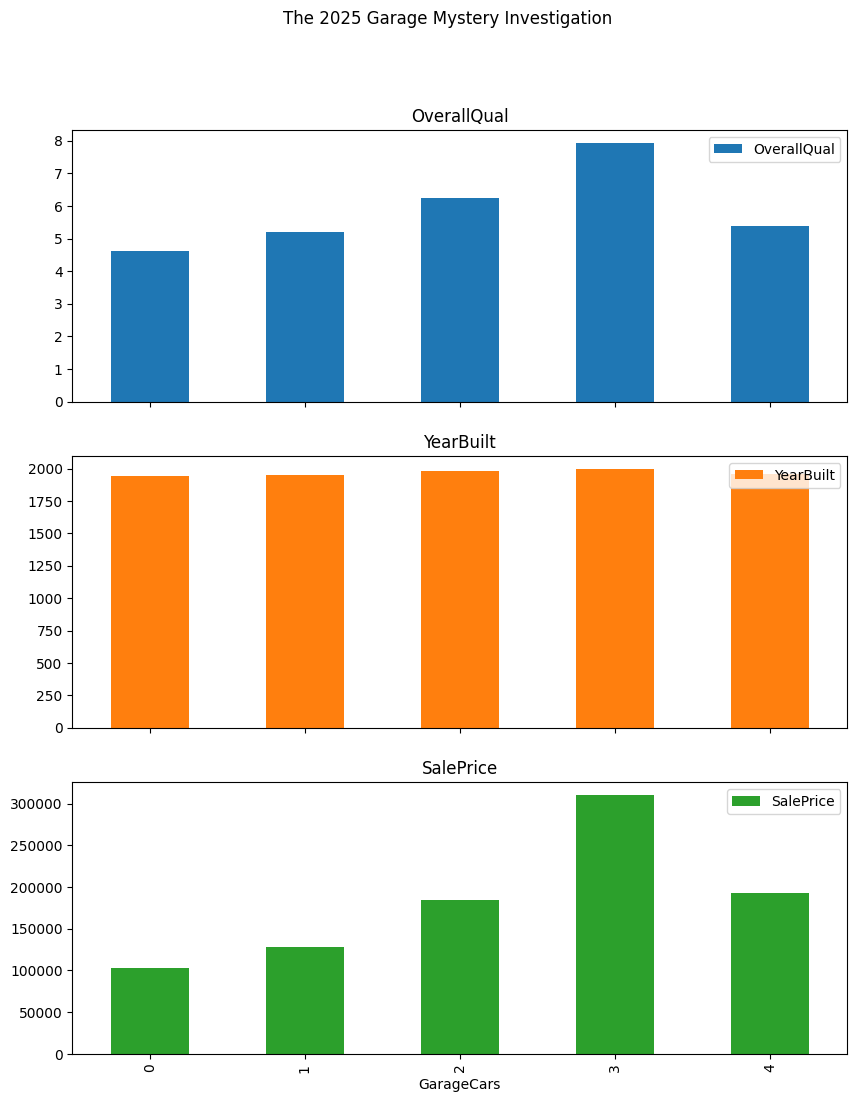

In [21]:
garage_mystery = df_cleaned.groupby('GarageCars')[['OverallQual', 'YearBuilt', 'SalePrice']].mean()
print(garage_mystery)
garage_mystery.plot(kind='bar', subplots=True, figsize=(10, 12), title='The 2025 Garage Mystery Investigation')
plt.show()

# 🏆 Mission Report: Building Specs Phase Complete!

本日、アメス住宅市場の「建物内部」に関する徹底的なプロファイリングを完了した。

### 🔑 Key Findings (主要な証拠):
- **Space is King**: 居住面積(GrLivArea)は価格と極めて高い相関を持つ。
- **The Luxury Gap**: お風呂(FullBath)の数で、同じ面積でも明確な価格の「階層」が生まれる。
- **History & Face**: 築年数によるヴィンテージ価値 と、外壁素材(Stone/ImStucc)によるステータス性の違いを確認。
- **The Absolute Power**: 総合品質(OverallQual)こそが、価格を支配する最大の要因である。
- **Utility Secrets**: 地下室(TotalBsmtSF)と車庫(GarageCars)も価格を押し上げるが、4台以上の車庫には「負の相関」の予兆（謎）がある。
- **The Heart of Value**: キッチンの質(KitchenQual)が、最終的な資産価値を決定づける。
『車庫4台の謎、解明済み』
**Next Step**　「機械学習モデル」へのデータ投入を開始する。